In [161]:
#import custom module with defined functions
from kinase_module import *


In [162]:
# imports
from __future__ import print_function
import warnings; warnings.simplefilter('ignore')
import sys
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate as cv
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.linear_model import LinearRegression as lr
from sklearn.ensemble import GradientBoostingRegressor as gb
from sklearn.svm import SVC
from sklearn.linear_model import ElasticNet as en
from sklearn import preprocessing
from sklearn.linear_model import Lasso as las
from sklearn.linear_model import BayesianRidge as br
from sklearn.preprocessing import StandardScaler as sc
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score

In [163]:
#!/usr/bin/env python
# coding: utf-8

# In[ ]:
import numpy as np



def add_gausian(y,mu,sigma):
    noise = np.random.normal(mu,sigma,[1381, 117])
    df_aug = df +noise 
    df_new = pd.concat([df,df_aug])
    return(df_new)

def drop_corr(df):
    '''Function drops highly correlated columns above a 0.95 threshold and outputs a new dataframe.

    Input:
        df: pandas DataFrame
        '''
    import numpy as np
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column]>0.95)]
    df_new = df.drop(df[to_drop],axis = 1)
    return(df_new)

def model_eval(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    #model_score = model.score(X_test,y_test)
    model_mse =  mse(y_test,pred)
    model_r2 =r2(y_test,pred)
    return(model_mse, model_r2)

In [164]:

#Data frame
#pd.read_csv('~/Desktop/data/kinase_files/KinaseP00533.csv')
df = pd.read_csv('~/Desktop/data/kinase_files/KinaseO00329.csv')
df.head()

,Unnamed: 0,target_id,pAc,smiles,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,0,O00329,1.4,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,114.564286,103.24,289.320,289.063346,...,0,0,1,2,0,0,0,0,2,1
1,1,O00329,1.5,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,113.674613,129.26,290.308,290.058595,...,0,0,1,2,0,0,0,0,2,1
2,2,O00329,1.5,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,132.979410,115.27,332.389,332.105545,...,0,0,1,2,0,0,0,0,2,1
3,3,O00329,1.5,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,144.913435,106.48,358.427,358.121195,...,0,1,1,2,0,0,0,0,2,1
4,4,O00329,1.5,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,151.840959,115.27,400.386,400.092929,...,0,0,1,2,0,0,0,0,2,1


In [165]:
#Check the shape of the dataframe
df.shape

(1381, 120)

In [166]:
drop_corr(df).head()

,Unnamed: 0,target_id,smiles,SlogP,SMR,TPSA,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN32,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41
0,0,O00329,CS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,0.7770,73.7402,103.24,7,2,2,1,...,0,0,0,1,2,0,0,0,0,2
1,1,O00329,C1=CN2C(=NC(=N2)N)C=C1C3=CC(=CN=C3)S(=O)(=O)N,0.0209,72.0036,129.26,8,4,2,2,...,0,0,0,1,2,0,0,0,0,2
2,2,O00329,CC(C)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=NC(=NN3C=C2)N,1.0602,86.0879,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2
3,3,O00329,CC1(CCN1S(=O)(=O)C2=CN=CC(=C2)C3=CC4=NC(=NN4C=...,1.5465,93.2182,106.48,8,2,3,1,...,1,0,1,1,2,0,0,0,0,2
4,4,O00329,CC(C)(C(F)(F)F)NS(=O)(=O)C1=CN=CC(=C1)C2=CC3=N...,1.9927,91.0859,115.27,8,3,4,2,...,0,0,0,1,2,0,0,0,0,2


In [167]:
drop_corr(df).shape

(1381, 93)

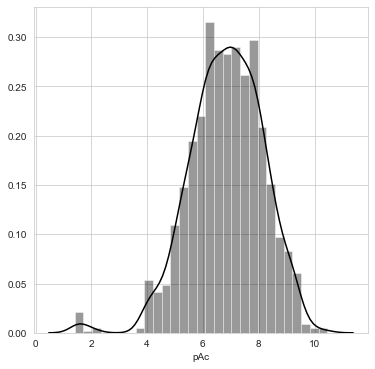

In [168]:
#Plot distribution of the pAc with the density estimation function
f, ax = plt.subplots(figsize=(6, 6))
sns.distplot(df.pAc,color = 'black');
sns.set_style("whitegrid")

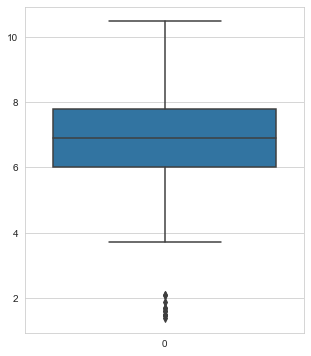

In [169]:
#Boxplot of pAc,It has a few outliers but the distribution in fairly normal
f, ax = plt.subplots(figsize=(5, 6))
sns.set_style("whitegrid")
data = df.pAc
sns.boxplot(data=data);

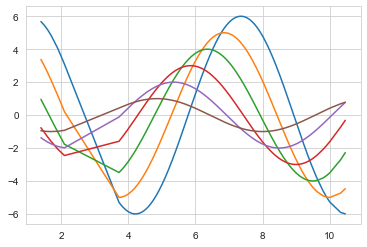

In [170]:
def sinplot(flip=1):
    x = df.pAc
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sinplot()

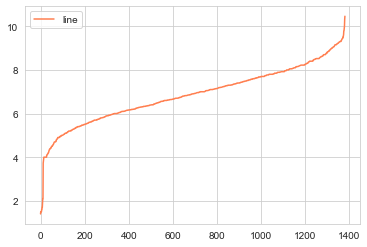

In [171]:
#line plot
ax = sns.lineplot(data=df["pAc"], color="coral", label="line")

In [172]:
#Drop unwanted colum(unnamed)
df = df.drop(['Unnamed: 0','smiles','target_id'], axis=1)
df.head()

,pAc,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,...,MQN33,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42
0,1.4,0.7770,73.7402,114.564286,103.24,289.320,289.063346,7,2,2,...,0,0,1,2,0,0,0,0,2,1
1,1.5,0.0209,72.0036,113.674613,129.26,290.308,290.058595,8,4,2,...,0,0,1,2,0,0,0,0,2,1
2,1.5,1.0602,86.0879,132.979410,115.27,332.389,332.105545,8,3,4,...,0,0,1,2,0,0,0,0,2,1
3,1.5,1.5465,93.2182,144.913435,106.48,358.427,358.121195,8,2,3,...,0,1,1,2,0,0,0,0,2,1
4,1.5,1.9927,91.0859,151.840959,115.27,400.386,400.092929,8,3,4,...,0,0,1,2,0,0,0,0,2,1


In [173]:
df.shape

(1381, 117)

In [174]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df.drop(columns=['pAc'],axis=1)
# Get the target vector
y = df["pAc"]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [176]:
#Check the shape of the training and testing data 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((966, 116), (415, 116), (966,), (415,))

In [177]:
X_test
print(X_test.shape)
y_test.shape

(415, 116)


(415,)

In [186]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVR

In [190]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['r2', 'neg_mean_squared_error']
scores = cross_validate(rf(), X, y, scoring=scoring,cv=5)
print(scores)

{'fit_time': array([0.34867334, 0.35766721, 0.34068274, 0.36283731, 0.33768559]), 'score_time': array([0.00499606, 0.0059979 , 0.0059948 , 0.0059936 , 0.00599504]), 'test_r2': array([ -3.53296839, -15.94720747, -11.52709541, -12.54420772,
       -10.52817772]), 'test_neg_mean_squared_error': array([-3.42268899, -0.72282053, -0.47510507, -0.59849975, -2.68625684])}


In [ ]:
r2_score(y_true, y_pred)

In [136]:

cv_r2_scores_rf = cross_val_score(rf(), X, y, cv=6,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 6-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

[ -3.43016809 -17.14007375 -12.71805553 -20.90375914 -20.45914393
  -9.46711567]
Mean 6-Fold R Squared: -14.01971935290438


In [141]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = rf()

In [ ]:
print('Mean:',str(np.mean(score)))

###### Add the X_train and y_train to form a a training set for augmentation

In [128]:
df_train_set = pd.concat([X_train, y_train], axis = 1)
df_train_set.head()

,SlogP,SMR,LabuteASA,TPSA,AMW,ExactMW,NumLipinskiHBA,NumLipinskiHBD,NumRotatableBonds,NumHBD,...,MQN34,MQN35,MQN36,MQN37,MQN38,MQN39,MQN40,MQN41,MQN42,pAc
592,2.74670,92.8582,143.954692,63.69,345.424,345.114712,6,1,2,1,...,0,1,3,0,0,0,0,4,2,6.640
858,5.13408,116.6794,180.702227,95.21,431.862,431.106149,7,2,4,2,...,0,2,3,0,0,0,0,4,2,7.300
271,1.95420,85.6116,131.088799,115.87,318.768,318.099587,7,5,3,3,...,0,1,2,0,0,0,0,2,1,5.790
1275,3.40440,135.4708,209.710836,99.05,488.596,488.264822,10,1,5,1,...,0,3,2,1,0,0,0,4,2,8.620
785,6.24672,150.1270,218.190532,37.83,491.635,491.257277,5,0,3,0,...,0,1,6,0,0,0,0,5,2,7.115


VALIDATION SET FOR EXTERNAL VALIDATION

In [132]:
X_test_val = X_test
y_test_val = y_test

In [ ]:

cv_r2_scores_rf = cross_val_score(rf_reg, predictors, target, cv=5,scoring='r2')
print(cv_r2_scores_rf)
print("Mean 5-Fold R Squared: {}".format(np.mean(cv_r2_scores_rf)))

In [40]:
cv_results = cv(rf(), X, y, cv=6)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=6, n_jobs=1)
print(this_scores)
this_scores.mean()

[ -3.64826497 -16.82490591 -13.40110028 -23.06746057 -18.64565378
  -9.4873194 ]


-14.179117485914594

In [ ]:
#Model with Random forest
print(model_eval(rf()))

In [ ]:
#Add noise of 0.01 to the dataframe
df1 = add_gausian(df,0,0.1)

df1.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df1.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df1["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
#Gradient boosting regression

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [214]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)
r2 = r2_score(y_test,y_pred)
r2

MSE: 0.4383


0.7545084696286404

In [220]:
print('Mean:',str(np.mean(r2)))

Mean: 0.7545084696286404


In [216]:
X_test.shape

(1243, 116)

In [217]:
y_pred.shape

(1243,)

ValueError: x and y must be the same size

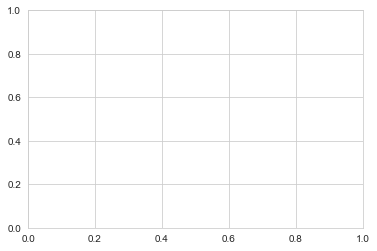

In [218]:
plt.scatter(X_test,y_test,color = 'red')
plt.plot(X_test,y_pred,color = 'blue',linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

Text(0, 0.5, 'Deviance')

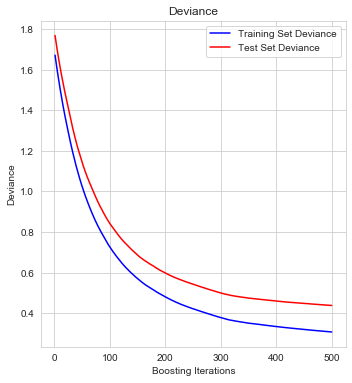

In [207]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

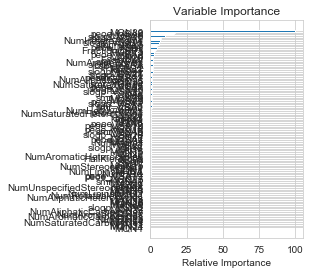

In [211]:
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:

print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [191]:
#Add noise of 0.02 to the dataframe
df2 = add_gausian(df,0,0.2)
df2 = pd.concat([df,df2])
df2.shape

(4143, 117)

In [193]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df2.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df2["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print(model_eval(rf()))

(0.2991770883565779, 0.8324395068222867)


In [199]:
scoring = ['r2', 'neg_mean_squared_error']
scores = cross_validate(rf(), X, y, scoring=scoring,cv=5)
print(scores)

{'fit_time': array([1.85938096, 1.92244148, 2.02923179, 1.56663656, 1.36880517]), 'score_time': array([0.00499582, 0.00699377, 0.00998974, 0.00599742, 0.0059948 ]), 'test_r2': array([ 0.89557993,  0.96406829,  0.82934805,  0.67113119, -0.60714055]), 'test_neg_mean_squared_error': array([-0.09410479, -0.09487354, -0.06322068, -0.85572675, -0.96027689])}


In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [200]:
from sklearn.metrics import r2_score
r2_score(y_true, y_pred)

In [ ]:
#Add noise of 0.03 to the dataframe
df3 = add_gausian(df,0,0.3)
df3 = pd.concat([df2,df3])
df3.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df3.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df3["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.04 to the dataframe
df4 = add_gausian(df,0,0.4)
df4 = pd.concat([df3,df4])
df4.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df4.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df4["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()

In [ ]:
#Add noise of 0.05 to the dataframe
df5 = add_gausian(df,0,0.5)
df5 = pd.concat([df4,df5])
df5.shape

In [ ]:
# Get the feature vector
#X = df.drop('smiles', 'mol', 'pAc', axis=1)
X = df5.drop(columns=['pAc'],axis=1).values
# Get the target vector
y = df5["pAc"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [ ]:
print(model_eval(rf()))

In [ ]:
cv_results = cross_validate(rf(), X, y, cv=10)
sorted(cv_results.keys())
this_scores = cross_val_score(rf(), X, y, cv=10, n_jobs=1)
print(this_scores)
this_scores.mean()